<a href="https://colab.research.google.com/github/Chirag314/Interpretable-AI/blob/main/Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Diabetes dataset from Explainable AI

In [41]:
import pandas as pd

In [42]:
from sklearn.datasets import load_diabetes
diabetes=load_diabetes()
X,y=diabetes['data'],diabetes['target']
X.shape

(442, 10)

In [43]:
# COnvert numpy data to pandas dataframe.
feature_rename={'age':'Age',
                'sex':'Sex',
                'bmi':'BMI',
                'bp':'BP',
                's1':'Total Cholesterol',
                's2':'LDL',
                's3':'HDL',
                's4':'Thyroid',
                's5':'Glucoma',
                's6':'Glucose'
                }
df_data=pd.DataFrame(X,columns=diabetes['feature_names'])
df_data.rename(columns=feature_rename,inplace=True)
df_data['target']=y

In [44]:
corr=df_data.corr()

[Text(0.5, 0, 'Age'),
 Text(1.5, 0, 'Sex'),
 Text(2.5, 0, 'BMI'),
 Text(3.5, 0, 'BP'),
 Text(4.5, 0, 'Total Cholesterol'),
 Text(5.5, 0, 'LDL'),
 Text(6.5, 0, 'HDL'),
 Text(7.5, 0, 'Thyroid'),
 Text(8.5, 0, 'Glucoma'),
 Text(9.5, 0, 'Glucose'),
 Text(10.5, 0, 'target')]

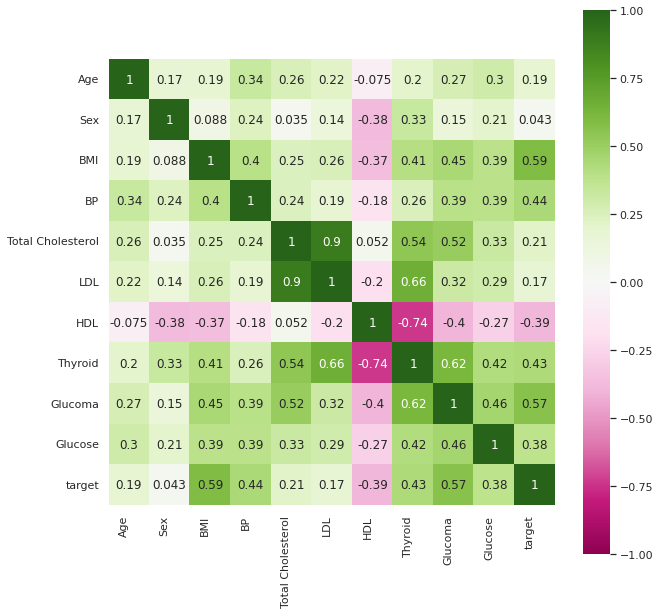

In [45]:
# plot correlation matrix
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')
sns.set_palette('bright')

f, ax=plt.subplots(figsize=(10,10))
sns.heatmap(corr,annot=True,vmin=-1,vmax=1,center=0,cmap='PiYG',
            square=True,
            ax=ax)
ax.set_xticklabels(ax.get_xticklabels(),
                   rotation=90,
                   horizontalalignment='right')

In [46]:
# Linear regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
lr_model=LinearRegression()
lr_model.fit(X_train,y_train)
y_pred=lr_model.predict(X_test)
mae=np.mean(np.abs(y_test-y_pred))
mae

42.79389304196525

In [47]:
# in the process of training a machine learning model, it is important to explore the data first and determine how correlated feautures are with each other.

In [48]:
feature_names=df_data.columns
feature_names

Index(['Age', 'Sex', 'BMI', 'BP', 'Total Cholesterol', 'LDL', 'HDL', 'Thyroid',
       'Glucoma', 'Glucose', 'target'],
      dtype='object')

Text(0, 0.5, 'Features')

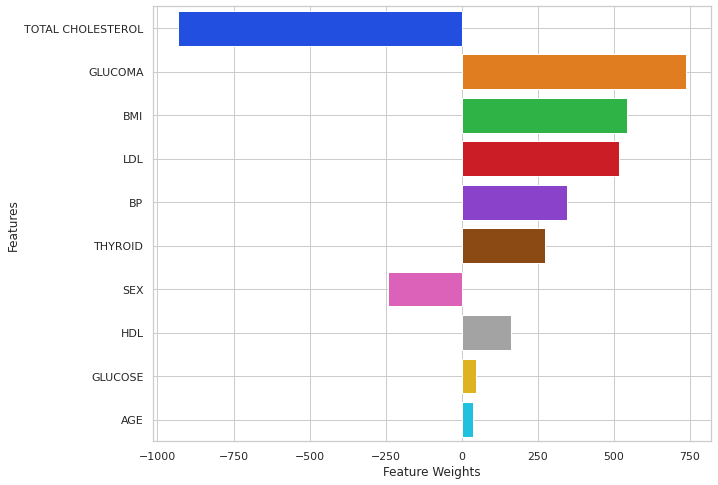

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')
sns.set_palette('bright')

weights=lr_model.coef_

feature_importance_idx=np.argsort(np.abs(weights))[::-1]
feature_importance=[feature_names[idx].upper( ) for idx in feature_importance_idx]
feature_importance_values=[weights[idx] for idx in feature_importance_idx]

f,ax=plt.subplots(figsize=(10,8))
sns.barplot(x=feature_importance_values,y=feature_importance,ax=ax)
ax.grid(True)
ax.set_xlabel('Feature Weights')
ax.set_ylabel('Features')

In [50]:
#Decision Trees
#A decision tree is a great machine learning algoriths that cane be used to model complex nonlinear relationships.
from sklearn.tree import DecisionTreeRegressor
dt_model=DecisionTreeRegressor(max_depth=3,random_state=42)

dt_model.fit(X_train,y_train)
y_pred=dt_model.predict(X_test)
mae=np.mean(np.abs(y_test-y_pred))
mae

48.654477064011274

In [51]:
feature_names=diabetes['feature_names']
#feature_names=df_data.columns

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


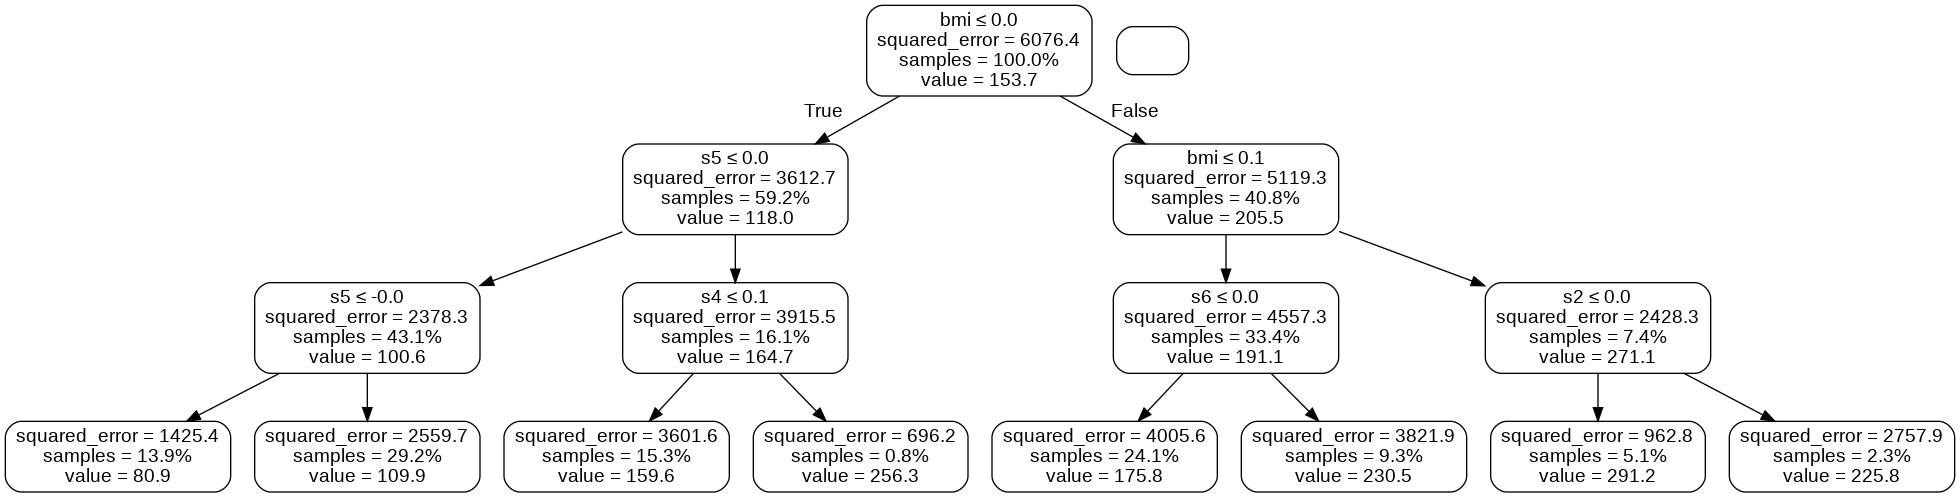

In [52]:
#Visualize a tree
!pip install six
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
diabetes_dt_dot_data=StringIO()
export_graphviz(dt_model,
                out_file=diabetes_dt_dot_data,
                filled=False,
                rounded=True,
                feature_names=feature_names,
                proportion=True,
                precision=1,
                special_characters=True)
dt_graph=pydotplus.graph_from_dot_data(diabetes_dt_dot_data.getvalue())
Image(dt_graph.create_png())


Because decision trees learn a nonlinear relationship between the imput features and the target, its hard to understand what effects changes to each of the imputs have on the output. We can compute relative imporrtance of each of the features in predicting the targed at a global level.

Text(0, 0.5, 'features')

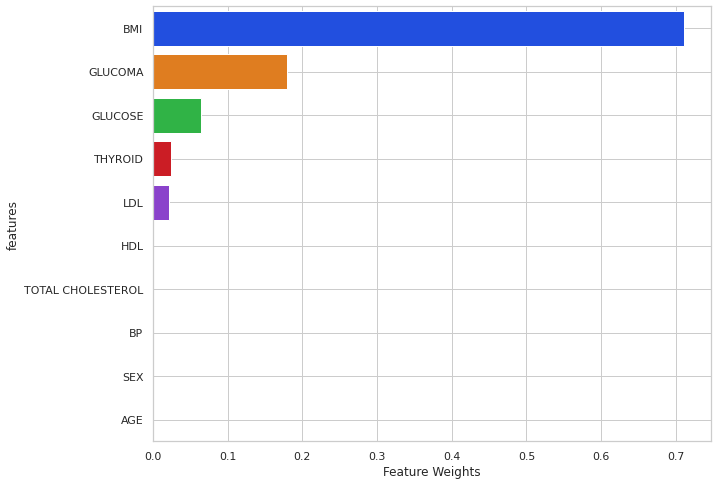

In [53]:
feature_names=df_data.columns
weights=dt_model.feature_importances_

feature_importance_idx=np.argsort(np.abs(weights))[::-1]
feature_importance=[feature_names[idx].upper() for idx in feature_importance_idx]
featue_importance_values=[weights[idx]for idx in feature_importance_idx]

f,ax =plt.subplots(figsize=(10,8))
sns.barplot(x=featue_importance_values,y=feature_importance,ax=ax)
ax.grid(True)
ax.set_xlabel('Feature Weights')
ax.set_ylabel('features')

We can reduce the complexity of the tree by setting the max_depth hyperparameter or by pruning the number of features you feed into the mode. We can determine what features to prune by visualizing the global feature importance .

Decision trees are prone to the problem of overfitting and high variance.